# KS Simulation


This notebook just show how to use the KS class and provides sample code to visualize the result. 

In [6]:
import numpy as np
import torch as th
import time
from scipy import stats
from KS import KS
import matplotlib.pyplot as plt
from sklearn import preprocessing

Set the main paramaters of the simulation

In [7]:
Tend = 1000 # the total time of the simulation
dt = 0.1 # the time step 
L = 20 # the "physical" length of the domaine. pay attention cuz this value will determine if the system is regular or chaotic
N =64 # the number of sample points on this length. It will be the size of the input in our system

For initial conditions, we have the choice. Let's plot some of the initial conditions done to study

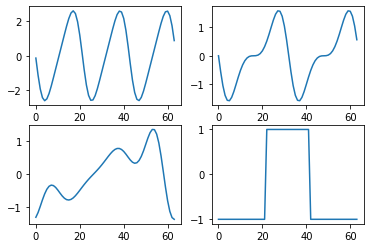

In [8]:
idx=1
for fn in ('u1.dat', 'u2.dat','u3.dat'):
    U_bf = np.loadtxt(fn) 
    ax=plt.subplot(2, 2, idx)
    ax.plot(U_bf)
    idx+=1
# This last is mine
U_bf = np.ones(64)*(-1)
U_bf[22:42] = 1
ax=plt.subplot(2, 2, idx)
ax.plot(U_bf)
plt.show()

In [9]:
print("Time points : ", Tend/dt)

Time points :  10000.0


In [10]:
ks = KS(L=L,N=N,dt=dt)

In [11]:
observation = U_bf
action = np.zeros(1)
U = np.matrix(U_bf) # We will stack in U at each time step

TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime, "seconds")
taxis = 0 
for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))

    


Running for :  10000 seconds


In [12]:
# Explore the results 
print(U.shape,taxis.shape)
print(taxis[-1])

(10001, 64) (10001,)
1000.0


In [13]:
ks.x.shape

(64,)

# Drawing the KS simulation

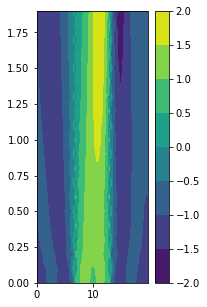

In [14]:
h=5 # the height of the figure
lg=20
fig = plt.figure(figsize=(h/2, h))
ax = fig.gca()
ola = ax.contourf(ks.x, taxis[:lg], U[:lg,:],  cmap=plt.cm.viridis)
cbar = plt.colorbar(ola)
plt.show()

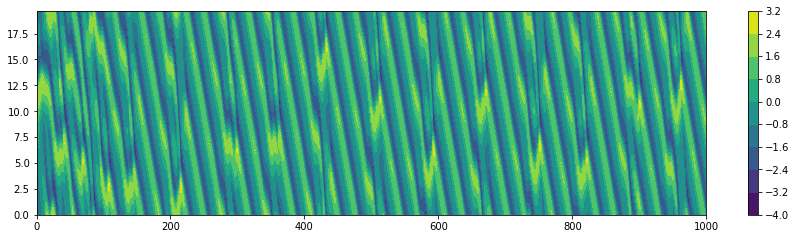

In [15]:
w=15 # the width of the figure
fig = plt.figure(figsize=(w, w/4))
ax = fig.gca()
ola = ax.contourf(taxis, ks.x, U.T,  cmap=plt.cm.viridis)
cbar = plt.colorbar(ola)
plt.show()

## Look closer

Start with a shortcut

In [17]:
def drawKS(U_sim, x_axis, t_axis ,startT=0,endT=0, width = 10, divwidth = 4): 
    fig = plt.figure(figsize=(width, width/divwidth))
    ax = fig.gca()
    ola = ax.contourf( t_axis[startT:endT], x_axis, U_sim[startT:endT,:].T,  cmap=plt.cm.viridis)
    cbar = plt.colorbar(ola)
    plt.show()

Look at the starting propagation

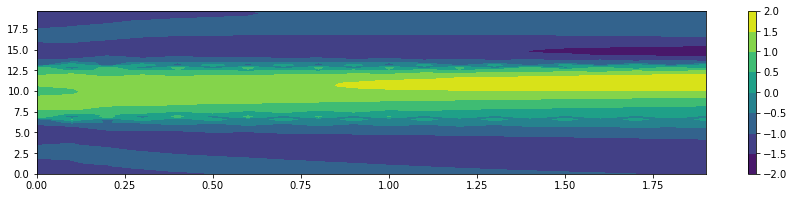

In [18]:
drawKS(U, ks.x, taxis,0,20,15,5)


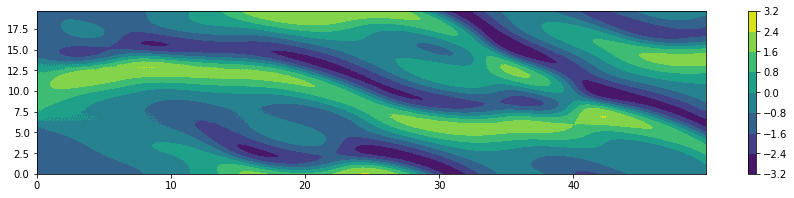

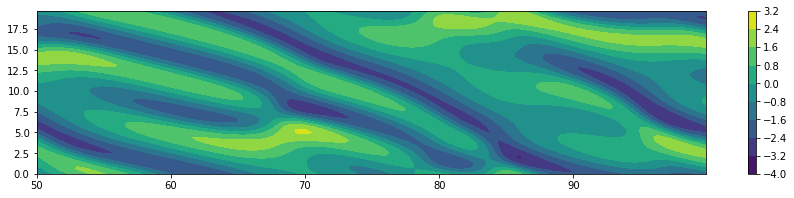

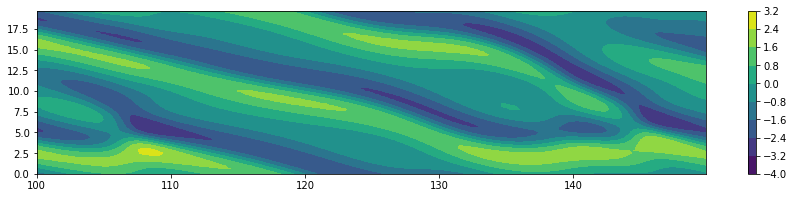

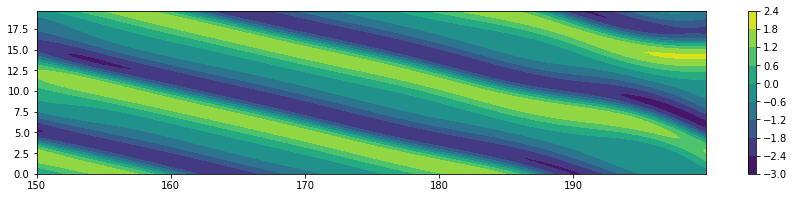

In [19]:
dom=500
for slide in range(4): 
    drawKS(U, ks.x, taxis,0+slide*dom,dom*(slide+1),15,5)


At the end 

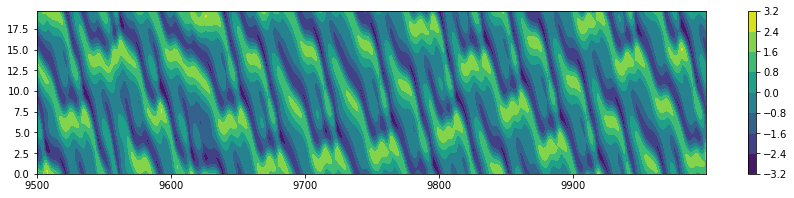

In [0]:
drawKS(U, ks.x, taxis,9500,10000,15,5)


# Note on the time and dt 
If we run two KS simulation: 
- Tend = 1000 and dt = 0.1
- Tend = 10000 and dt = 1
They both cover the same time domain however the results differ. 


In [20]:
Tend=1000
dt = 0.1
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
U1=U
ks1=ks

Running for :  10000


In [21]:
Tend=10000
dt = 1
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
    if taxis[-1]==100:
      print('ok1')
    if taxis[-1]==1000:
      print('ok2')
    if taxis[-1]==10000:
      print('ok3')
    if taxis[-1]==50000:
      print('ok4')
U2=U
ks2=ks

Running for :  10000
ok1
ok2
ok3


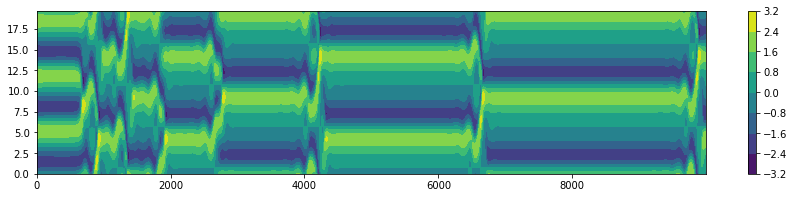

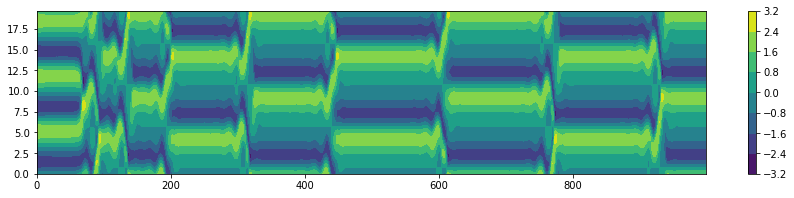

In [22]:
drawKS(U1, ks1.x, taxis,0,10000,15,5)
drawKS(U2, ks2.x, taxis,0,1000,15,5)


Let's see if the simulation depends only on the dt:

In [55]:
Tend=2000
dt = 0.1
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
Tend1=Tend
U1=U
ks1=ks
taxis1=taxis

Running for :  20000


In [56]:
Tend=1000
dt = 0.1
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
    if taxis[-1]==100:
      print('ok1')
    if taxis[-1]==1000:
      print('ok2')
    if taxis[-1]==10000:
      print('ok3')
    if taxis[-1]==50000:
      print('ok4')
Tend2=Tend
U2=U
ks2=ks
taxis2=taxis

Running for :  10000
ok1
ok2


In [57]:
print(U1[0:10001,:].shape)
print(U2.shape)
U2==U1[0:10001,:]

(10001, 64)
(10001, 64)


matrix([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])

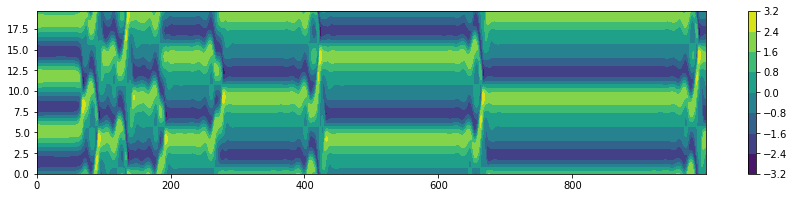

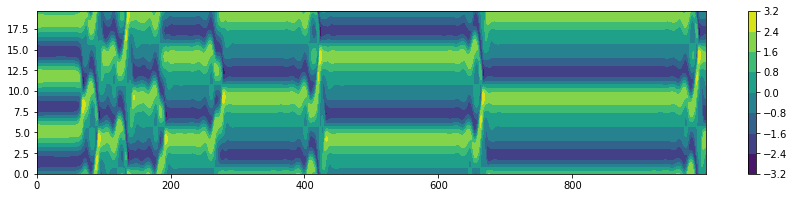

In [60]:
drawKS(U1, ks1.x, taxis1,0,10000,15,5)
drawKS(U2, ks2.x, taxis2,0,10000,15,5)

In [91]:
Tend=5000
dt = 0.1
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
    if nt==100:
      print('100th iteraction: ok')
    if nt==1000:
      print('1000th iteraction: ok')
    if nt==2500:
      print('2500th iteraction: ok')
    if nt==5000:
      print('5000th iteraction: ok')
    if nt==10000:
      print('10000th iteraction: ok')
    if nt==50000:
      print('50000th iteraction: ok')

Tend1=Tend
U1=U
ks1=ks
taxis1=taxis

Running for :  50000
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok


In [92]:
Tend=5000
dt = 0.2
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
    if nt==100:
      print('100th iteraction: ok')
    if nt==1000:
      print('1000th iteraction: ok')
    if nt==2500:
      print('2500th iteraction: ok')
    if nt==5000:
      print('5000th iteraction: ok')
    if nt==10000:
      print('10000th iteraction: ok')
    if nt==50000:
      print('50000th iteraction: ok')
Tend2=Tend
U2=U
ks2=ks
taxis2=taxis

Running for :  50000
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok


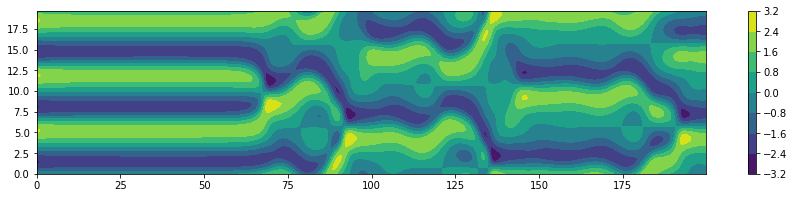

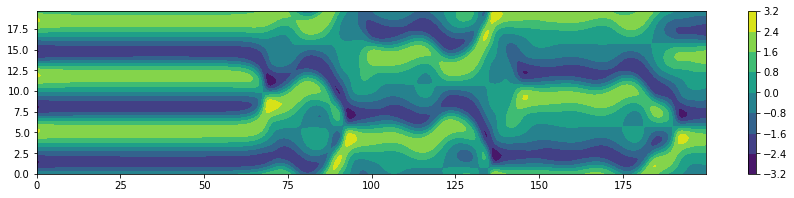

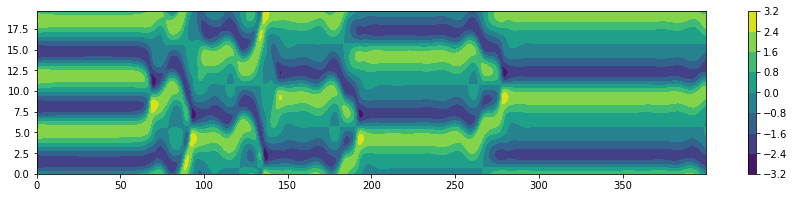

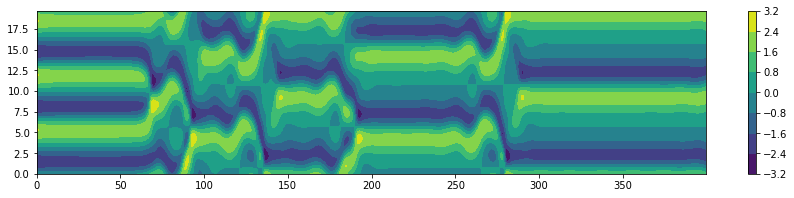

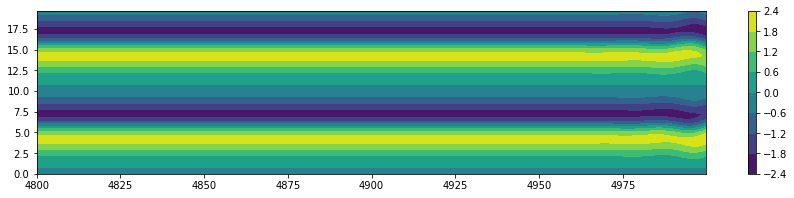

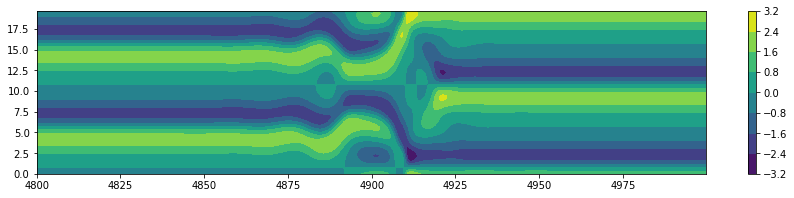

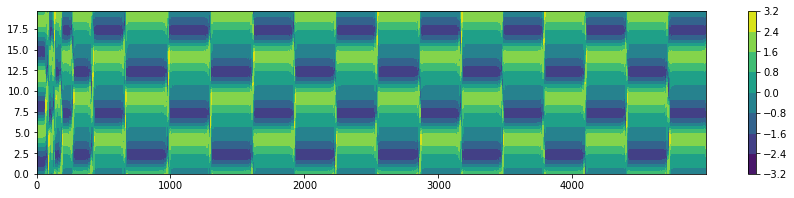

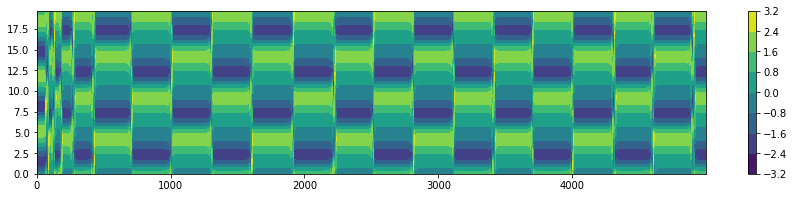

In [94]:
drawKS(U1, ks1.x, taxis1,0,2000,15,5)
drawKS(U2, ks2.x, taxis2,0,1000,15,5)

drawKS(U1, ks1.x, taxis1,0,4000,15,5)
drawKS(U2, ks2.x, taxis2,0,2000,15,5)


drawKS(U1, ks1.x, taxis1,48000,50000,15,5)
drawKS(U2, ks2.x, taxis2,24000,25000,15,5)

drawKS(U1, ks1.x, taxis1,0,50000,15,5)
drawKS(U2, ks2.x, taxis2,0,25000,15,5)

As we can see, they provides different solutions. What is the minimum value of dt to have a good solution?

In [95]:
Tend=500
dt = 0.01
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
    if nt==100:
      print('100th iteraction: ok')
    if nt==1000:
      print('1000th iteraction: ok')
    if nt==2500:
      print('2500th iteraction: ok')
    if nt==5000:
      print('5000th iteraction: ok')
    if nt==10000:
      print('10000th iteraction: ok')
    if nt==50000:
      print('50000th iteraction: ok')

Tend1=Tend
U1=U
ks1=ks
taxis1=taxis

Running for :  50000
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok


In [100]:
Tend=500
dt = 0.02
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
    if nt==100:
      print('100th iteraction: ok')
    if nt==1000:
      print('1000th iteraction: ok')
    if nt==2500:
      print('2500th iteraction: ok')
    if nt==5000:
      print('5000th iteraction: ok')
    if nt==10000:
      print('10000th iteraction: ok')
    if nt==50000:
      print('50000th iteraction: ok')
Tend2=Tend
U2=U
ks2=ks
taxis2=taxis

Running for :  25000
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok


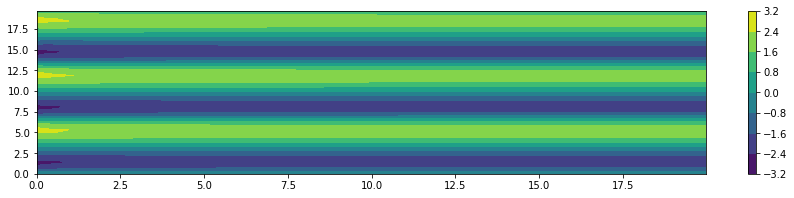

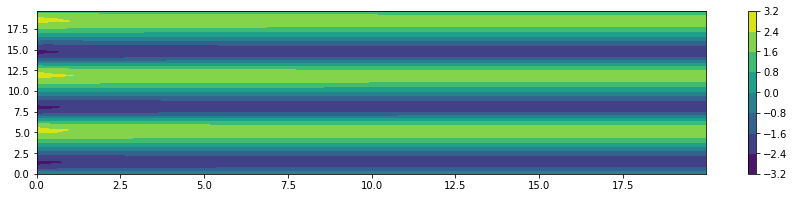

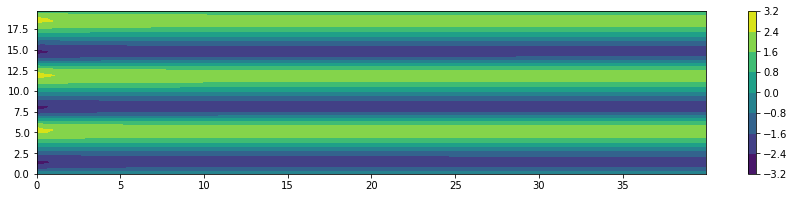

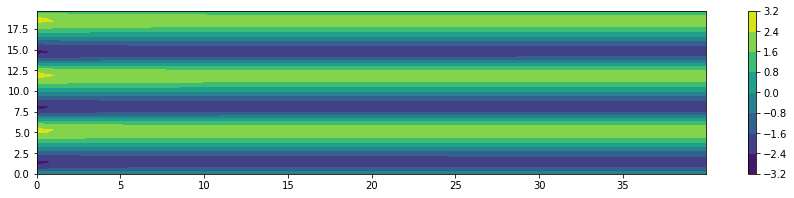

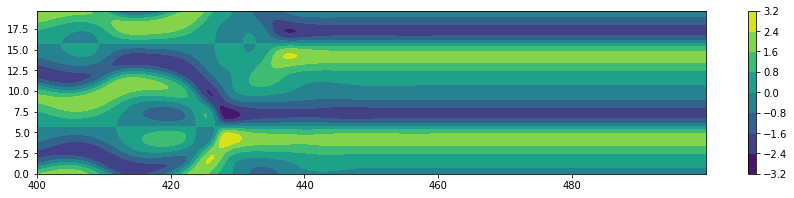

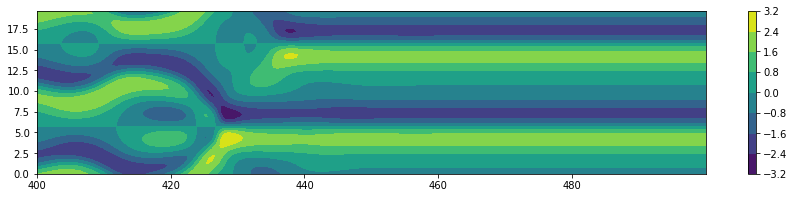

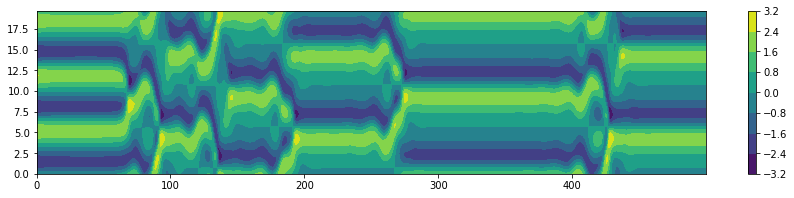

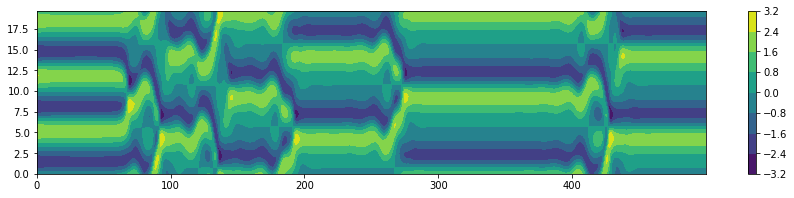

In [104]:
drawKS(U1, ks1.x, taxis1,0,2000,15,5)
drawKS(U2, ks2.x, taxis2,0,1000,15,5)

drawKS(U1, ks1.x, taxis1,0,4000,15,5)
drawKS(U2, ks2.x, taxis2,0,2000,15,5)


drawKS(U1, ks1.x, taxis1,40000,50000,15,5)
drawKS(U2, ks2.x, taxis2,20000,25000,15,5)

drawKS(U1, ks1.x, taxis1,0,50000,15,5)
drawKS(U2, ks2.x, taxis2,0,25000,15,5)

In [105]:
Tend=500
dt = 0.05
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
    if nt==100:
      print('100th iteraction: ok')
    if nt==1000:
      print('1000th iteraction: ok')
    if nt==2500:
      print('2500th iteraction: ok')
    if nt==5000:
      print('5000th iteraction: ok')
    if nt==10000:
      print('10000th iteraction: ok')
    if nt==50000:
      print('50000th iteraction: ok')
Tend3=Tend
U3=U
ks3=ks
taxis3=taxis

Running for :  10000
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok


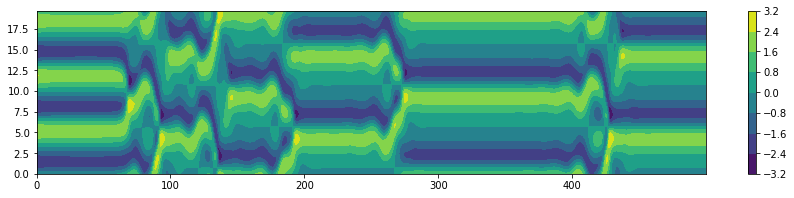

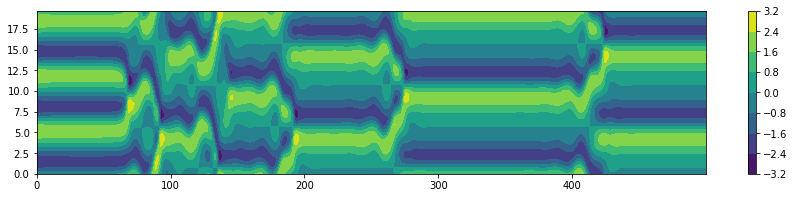

In [106]:
drawKS(U1, ks1.x, taxis1,0,50000,15,5)
drawKS(U3, ks3.x, taxis3,0,10000,15,5)

In [107]:
Tend=500
dt = 0.001
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
    if nt==100:
      print('100th iteraction: ok')
    if nt==1000:
      print('1000th iteraction: ok')
    if nt==2500:
      print('2500th iteraction: ok')
    if nt==5000:
      print('5000th iteraction: ok')
    if nt==10000:
      print('10000th iteraction: ok')
    if nt==50000:
      print('50000th iteraction: ok') 
Tend4=Tend
U4=U
ks4=ks
taxis4=taxis

Running for :  500000
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok
50000th iteraction: ok


KeyboardInterrupt: 